In [1]:
%pylab inline
import matplotlib.pyplot as plt
from foof import syn
from foof.fit import FOOF
import numpy as np
import os
import scipy.io
import scipy.signal
import pandas as pd
import bisect
from foof import syn

Populating the interactive namespace from numpy and matplotlib


In [2]:
p = '/Users/Torben/Documents/nsaba_foof/Subject1_PSD_Scout_0-500Hz.mat'
dat = scipy.io.loadmat(p)
freqs = np.squeeze(dat['Freqs'])
psds = np.squeeze(dat['TF'])

In [4]:
all_cfs = [];
all_chi = [];
chis_w_high_cf = [];

for x in xrange(len(psds)):
    foof = FOOF(min_p=0.1,res = freqs[1]-freqs[0])
    temp_psd= np.expand_dims(psds[x,bisect.bisect(freqs,3):bisect.bisect(freqs,50)-1].T,axis=1)
    foof.model(freqs[bisect.bisect(freqs,3):bisect.bisect(freqs,50)-1],temp_psd)
    all_cfs.extend(foof.centers_)
    all_chi.append(foof.chi_)
    for i in foof.centers_:
        if i > 40:
            chis_w_high_cf.append(foof.chi_)
            break
    #plt.plot(freqs[bisect.bisect(freqs,3):bisect.bisect(freqs,50)-1],log(temp_psd))

[  6.49922812  17.72079715  43.78158454  47.91706448]
[  2.94445141e-23   1.14356387e-23   5.26630876e-24   5.27618692e-24]


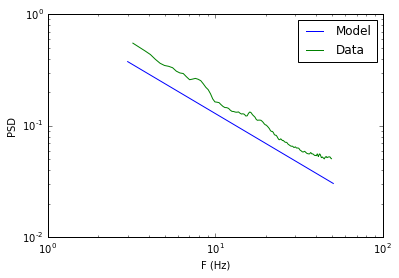

In [4]:
for x in [30]:#xrange(10):
    foof = FOOF(min_p=0.1,res = freqs[1]-freqs[0])
    temp_psd= np.expand_dims(psds[x,bisect.bisect(freqs,3):bisect.bisect(freqs,50)-1].T,axis=1)
    foof.model(freqs[bisect.bisect(freqs,3):bisect.bisect(freqs,50)-1],temp_psd)
    print foof.centers_
    print foof.powers_
    plt.plot(*syn.mfonef(mk=foof.powers_,#*10**23,
                     mf=foof.centers_, 
                     mf_sig=foof.stdevs_, 
                     f0=3, 
                     fmax=50, 
                     chi=foof.chi_, 
                     res=freqs[1]-freqs[0]), 
         label='Model'
        )
    plt.plot(freqs[bisect.bisect(freqs,3):bisect.bisect(freqs,50)-1],temp_psd*10**22,label='Data')

    plt.xscale('log')
    plt.yscale('log')    
    plt.xlabel("F (Hz)")
    plt.ylabel("PSD")
    plt.legend()

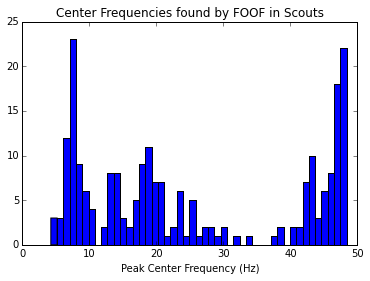

In [13]:
plt.hist(all_cfs,47)
plt.title('Center Frequencies found by FOOF in Scouts')
plt.xlabel('Peak Center Frequency (Hz)')

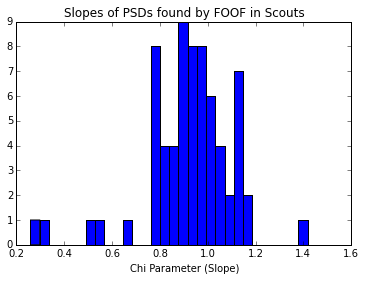

In [14]:
plt.hist(all_chi,30)
plt.title('Slopes of PSDs found by FOOF in Scouts')
plt.xlabel('Chi Parameter (Slope)')

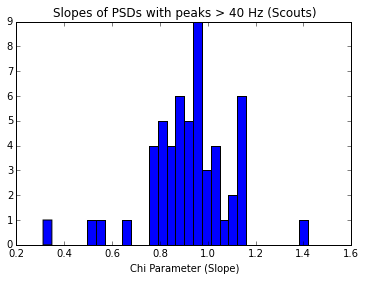

In [15]:
plt.hist(chis_w_high_cf,30)
plt.title('Slopes of PSDs with peaks > 40 Hz (Scouts)')
plt.xlabel('Chi Parameter (Slope)')